## Download data and EDA

In [12]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import joblib


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Загрузка датасета
df = pd.read_csv('2015-street-tree-census-tree-data.csv')
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,2015-08-27T00:00:00.000,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,2015-09-03T00:00:00.000,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,NaN,NaN,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,2015-09-05T00:00:00.000,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,2015-09-05T00:00:00.000,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,2015-08-30T00:00:00.000,21,0,OnCurb,Alive,Good,Tilia americana,American linden,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [3]:
df.shape

(683788, 45)

In [4]:
# Смотрим есть ли повторяющиеся деревья
df['tree_id'].nunique()

683788

Повторяющихся деревьев нет, т.к. количество объектов соответствует количеству уникальных значиний в колонке "tree_id"

In [6]:
# Оставляем только те объекты, в которых сзвестно состояние дерева
df = df[df['health'].notnull()]

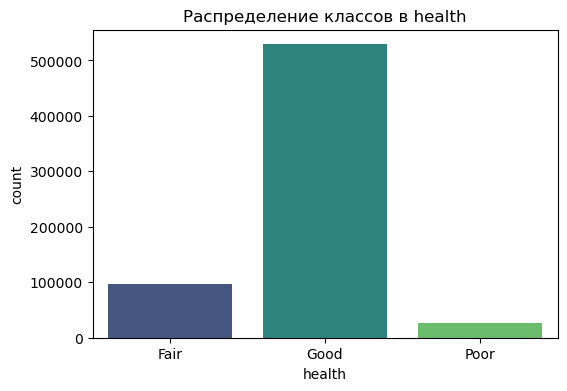

health
Good    0.810906
Fair    0.147973
Poor    0.041121
Name: proportion, dtype: float64


In [9]:
# Распределение классов в `health`
plt.figure(figsize=(6, 4))
sns.countplot(x=df["health"], palette="viridis")
plt.title("Распределение классов в health")
plt.show()

# Проверим баланс классов
print(df["health"].value_counts(normalize=True))

In [7]:
# Определяем катекориальные признаки
categorical_features = df.select_dtypes(include='object').columns

In [8]:
# Смотрим описание категориальных признаков
df.describe(include='object')

,created_at,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,zip_city,borough,nta,nta_name,state
count,652172,652172,652172,652172,652167,652167,164350,79866,652171,652172,225844,652172,652172,652172,652172,652172,652172,652172,652172,652172,652172,652172,652172,652172,652172,652172
unique,483,2,1,3,132,132,3,3,2,3,231,2,2,2,2,2,2,2,2,2,395403,48,5,188,188,1
top,2015-10-27T00:00:00.000,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,1or2,Helpful,NoDamage,TreesCount Staff,Stones,No,No,No,No,No,No,No,No,No,106 CROSS BAY BOULEVARD,Brooklyn,Queens,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,New York
freq,6494,626297,652172,528850,87014,87014,143557,51866,464978,282258,95673,512173,648636,621850,638898,651141,619599,589807,651761,627817,210,169751,237974,12530,12530,652172


После изучения описания категориальных признаков:

    - Удаляем константные признаки (status, state), а также колонку "created_at".
    - Колонки (address, zip_city, nta, nta_name) дают информацию о рпенадлежности к определенной местсности, можем оставить только признак "borough"(в каком районе находится дерево)
    - spc_latin и spc_common идентичные колонки, которые определяют название дерева, поэтому можем оставить только одну(например spc_common)

In [13]:
# Посмотрим на распределение названия деревьев в таргете
distribution = df.groupby(['spc_common', 'health']).size().unstack(fill_value=0)

# Расчет относительных значений
relative_distribution = distribution.div(distribution.sum(axis=1), axis=0)

print(relative_distribution)

health                      Fair      Good      Poor
spc_common                                          
'Schubert' chokecherry  0.146686  0.803805  0.049509
American beech          0.139194  0.783883  0.076923
American elm            0.162382  0.804013  0.033605
American hophornbeam    0.146161  0.801110  0.052729
American hornbeam       0.133817  0.804878  0.061305
American larch          0.173913  0.804348  0.021739
American linden         0.143681  0.801478  0.054841
Amur cork tree          0.207650  0.661202  0.131148
Amur maackia            0.127902  0.824306  0.047792
Amur maple              0.150805  0.800390  0.048804
Atlantic white cedar    0.169014  0.740845  0.090141
Atlas cedar             0.103448  0.885057  0.011494
Callery pear            0.148801  0.815751  0.035448
Chinese chestnut        0.121387  0.867052  0.011561
Chinese elm             0.129280  0.840599  0.030122
Chinese fringetree      0.106838  0.867521  0.025641
Chinese tree lilac      0.155844  0.809524  0.

In [14]:
# Выбираем категориальные признаки, которые посчитали неинформативными
cat_cols_to_drop = ['status', 'created_at', 'spc_latin', 'spc_common', 'user_type', 'problems', 'address', 'zip_city', 'nta', 'nta_name', 'state']

In [15]:
# Удаление выбранных категориальных признаков
df = df.drop(cat_cols_to_drop, axis=1)
df.head()

,tree_id,block_id,tree_dbh,stump_diam,curb_loc,health,steward,guards,sidewalk,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,community board,borocode,borough,cncldist,st_assem,st_senate,boro_ct,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,3,0,OnCurb,Fair,NaN,NaN,NoDamage,No,No,No,No,No,No,No,No,No,11375,406,4,Queens,29,28,16,4073900,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,21,0,OnCurb,Fair,NaN,NaN,Damage,Yes,No,No,No,No,No,No,No,No,11357,407,4,Queens,19,27,11,4097300,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,3,0,OnCurb,Good,1or2,NaN,Damage,No,No,No,No,No,No,No,No,No,11211,301,3,Brooklyn,34,50,18,3044900,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,10,0,OnCurb,Good,NaN,NaN,Damage,Yes,No,No,No,No,No,No,No,No,11211,301,3,Brooklyn,34,53,18,3044900,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,21,0,OnCurb,Good,NaN,NaN,Damage,Yes,No,No,No,No,No,No,No,No,11215,306,3,Brooklyn,39,44,21,3016500,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [16]:
df.describe(include='object')

,curb_loc,health,steward,guards,sidewalk,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
count,652172,652172,164350,79866,652171,652172,652172,652172,652172,652172,652172,652172,652172,652172,652172
unique,2,3,3,3,2,2,2,2,2,2,2,2,2,2,5
top,OnCurb,Good,1or2,Helpful,NoDamage,No,No,No,No,No,No,No,No,No,Queens
freq,626297,528850,143557,51866,464978,512173,648636,621850,638898,651141,619599,589807,651761,627817,237974


In [17]:
# Обновляем список категориальных признаков
categorical_features = df.select_dtypes(include='object').columns

In [18]:
# Смотрим на пропуски
df[categorical_features].isna().sum()

curb_loc           0
health             0
steward       487822
guards        572306
sidewalk           1
root_stone         0
root_grate         0
root_other         0
trunk_wire         0
trnk_light         0
trnk_other         0
brch_light         0
brch_shoe          0
brch_other         0
borough            0
dtype: int64

In [19]:
# Заполняем пропуски
df['steward'] = df['steward'].fillna('No')
df['guards'] = df['guards'].fillna('No')
df['sidewalk'] = df['sidewalk'].fillna('NoDamage')

In [20]:
df[categorical_features].isna().sum()

curb_loc      0
health        0
steward       0
guards        0
sidewalk      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
borough       0
dtype: int64

### Посмотрим на распределение выбранных категориальных признаков в таргете

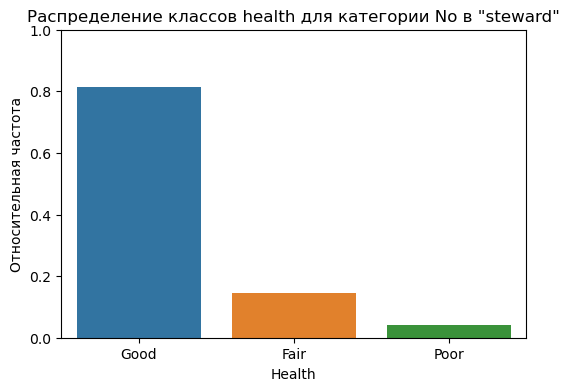

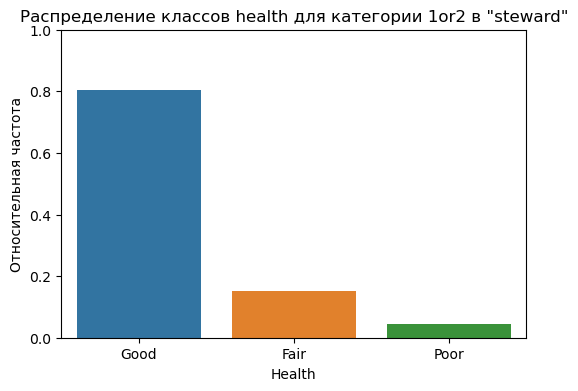

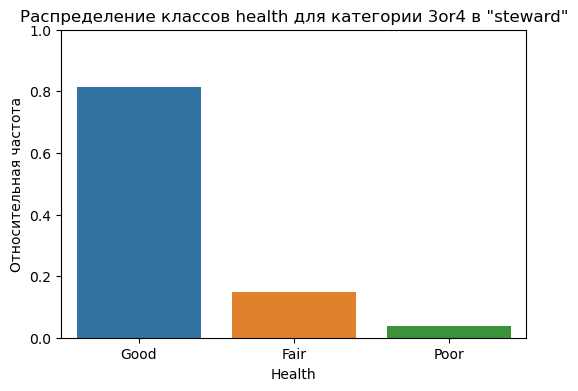

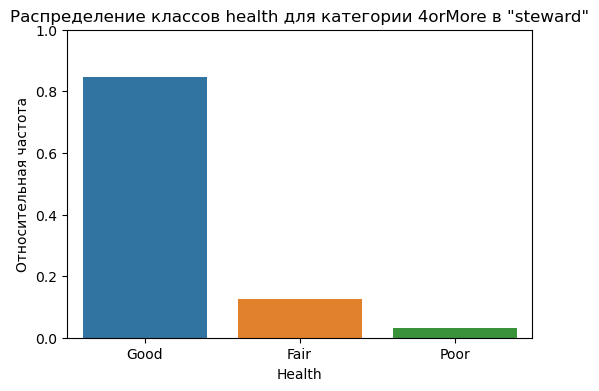

In [21]:
for category in df['steward'].unique():
    plt.figure(figsize=(6, 4))
    
    subset = df[df['steward'] == category]
    
    counts = subset['health'].value_counts(normalize=True)
    
    # Построение графика
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Распределение классов health для категории {category} в "steward"')
    plt.xlabel('Health')
    plt.ylabel('Относительная частота')
    plt.ylim(0, 1)
    plt.show()

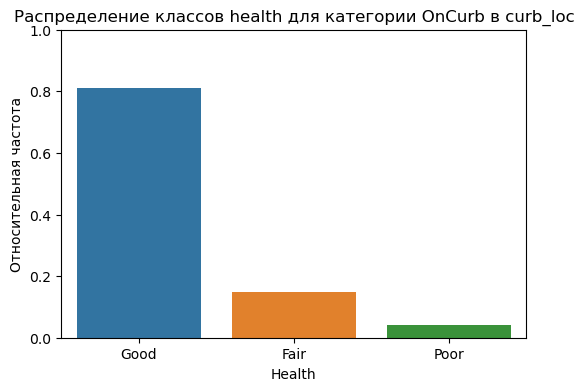

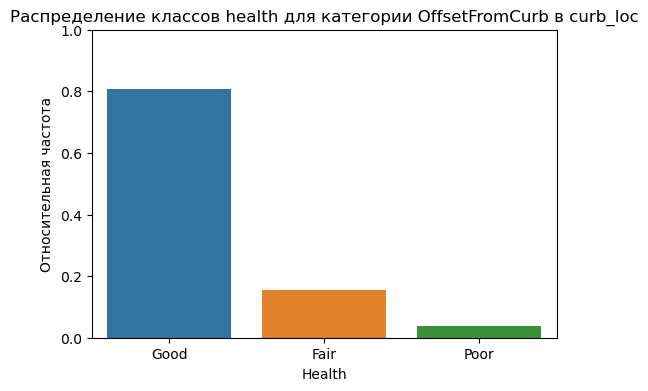

In [22]:
for category in df['curb_loc'].unique():
    plt.figure(figsize=(6, 4))
    
    subset = df[df['curb_loc'] == category]
    
    counts = subset['health'].value_counts(normalize=True)

    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Распределение классов health для категории {category} в curb_loc')
    plt.xlabel('Health')
    plt.ylabel('Относительная частота')
    plt.ylim(0, 1)
    plt.show()

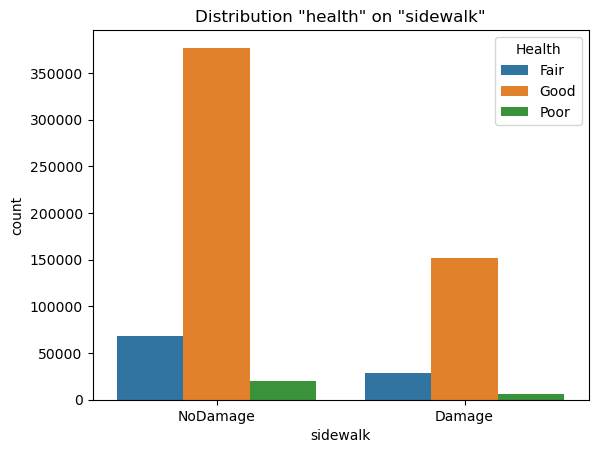

In [24]:
# Распределение в признаке sidewalk
sns.countplot(data=df, x='sidewalk', hue='health')
plt.title('Distribution "health" on "sidewalk"')
plt.xlabel('sidewalk')
plt.ylabel('count')
plt.legend(title='Health')
plt.show()

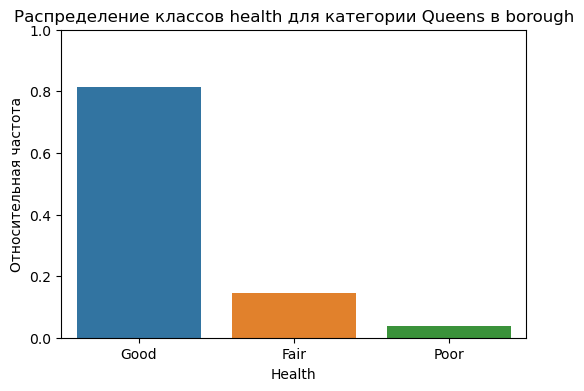

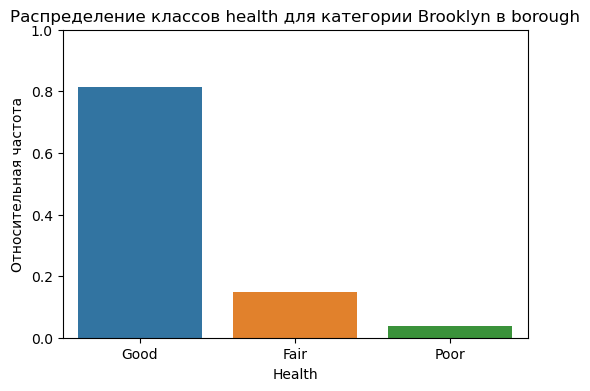

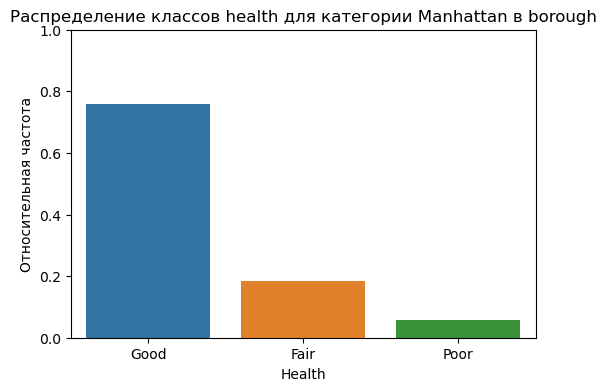

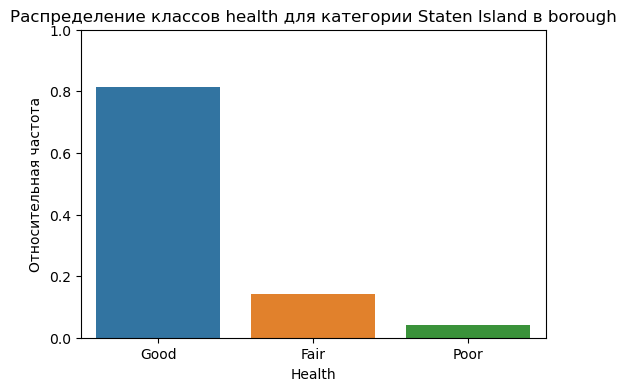

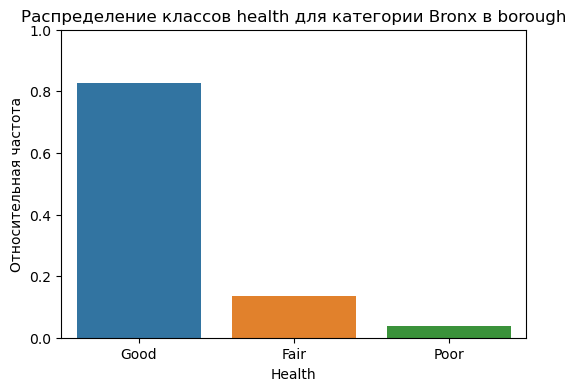

In [25]:
for category in df['borough'].unique():
    plt.figure(figsize=(6, 4))
    
    subset = df[df['borough'] == category]
    
    counts = subset['health'].value_counts(normalize=True)

    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Распределение классов health для категории {category} в borough')
    plt.xlabel('Health')
    plt.ylabel('Относительная частота')
    plt.ylim(0, 1)
    plt.show()

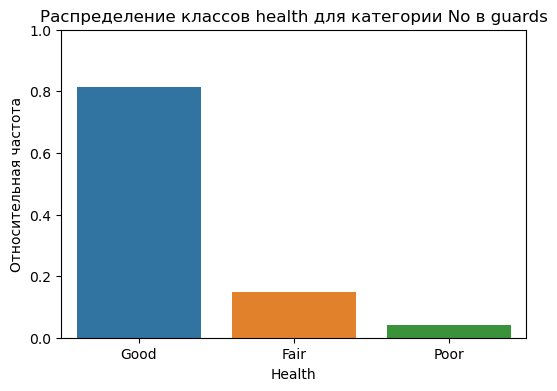

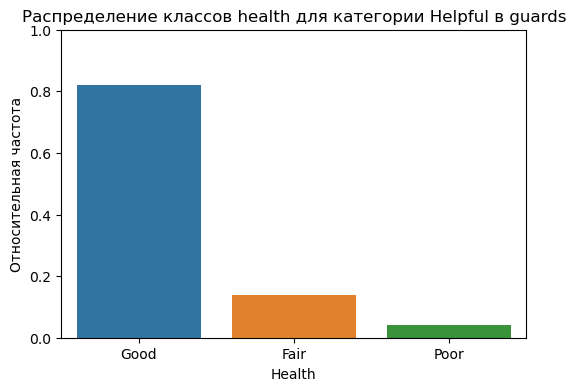

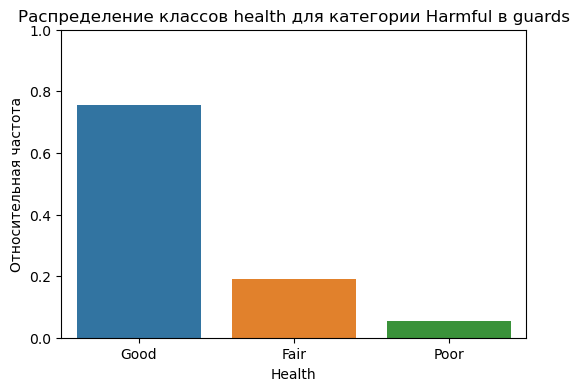

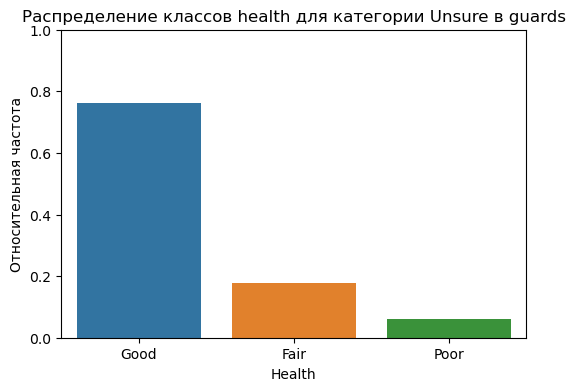

In [26]:
for category in df['guards'].unique():
    plt.figure(figsize=(6, 4))
    
    subset = df[df['guards'] == category]
    
    counts = subset['health'].value_counts(normalize=True)
    
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Распределение классов health для категории {category} в guards')
    plt.xlabel('Health')
    plt.ylabel('Относительная частота')
    plt.ylim(0, 1)
    plt.show()

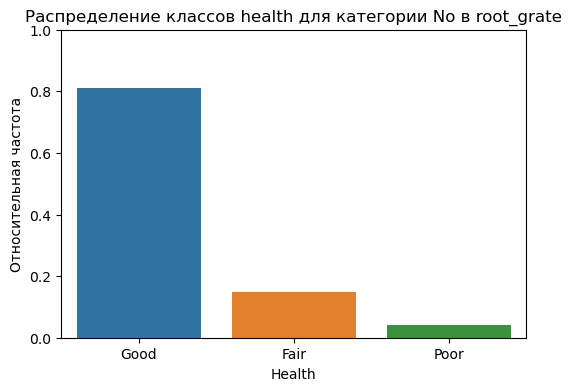

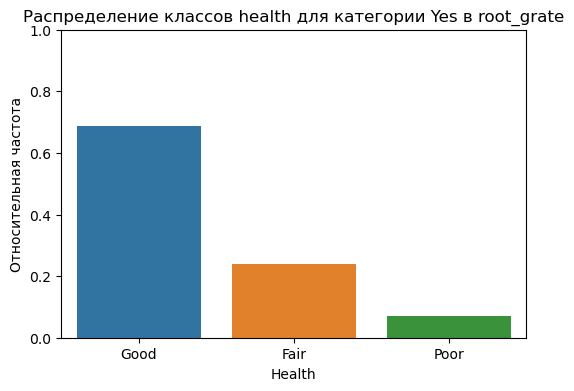

In [27]:
for category in df['root_grate'].unique():
    plt.figure(figsize=(6, 4))
    
    subset = df[df['root_grate'] == category]
    
    counts = subset['health'].value_counts(normalize=True)
    
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Распределение классов health для категории {category} в root_grate')
    plt.xlabel('Health')
    plt.ylabel('Относительная частота')
    plt.ylim(0, 1)
    plt.show()

In [28]:
# Определяем вещественные признаки
numeric_features = df.select_dtypes(exclude=['object']).columns

In [29]:
# Просмотр первых строк датасета
df[numeric_features].head()

,tree_id,block_id,tree_dbh,stump_diam,postcode,community board,borocode,cncldist,st_assem,st_senate,boro_ct,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,3,0,11375,406,4,29,28,16,4073900,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,21,0,11357,407,4,19,27,11,4097300,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,3,0,11211,301,3,34,50,18,3044900,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,10,0,11211,301,3,34,53,18,3044900,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,21,0,11215,306,3,39,44,21,3016500,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


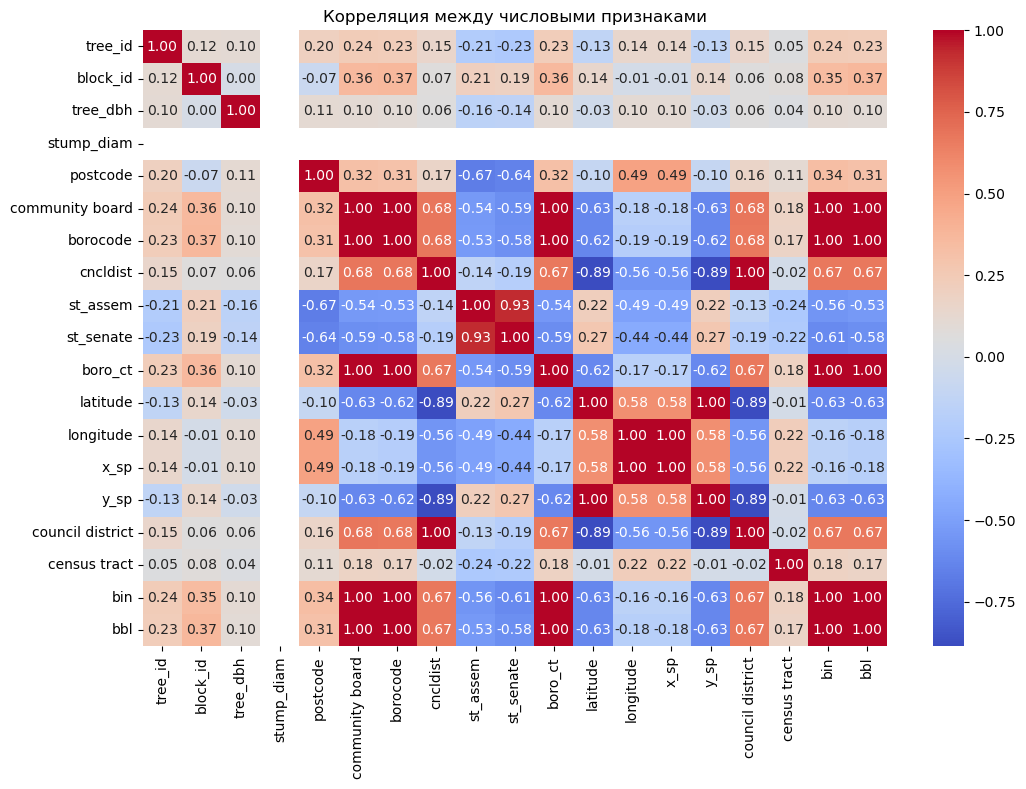

In [30]:
# Корреляция между числовыми признаками
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция между числовыми признаками")
plt.show()

### Предварительный анализ вещественных признаков

- колонки "tree_id" и "block_id" не являются вещественными признаками дерева
- stump_diam(размер пня) константный признак - не может принимать какое-либо значение, т.к. в предыдущих шагах оставили только живые деревья
- "postcode", "community board", "borocode", "cncldist", "st_senate", "council district", "census tract" - не являются вещественными, хоть и принимают числовые значения, а указывают на территориальную принадлежность.
- "bin" и "bbl" содержат общую информацию по территориальной принадлежности(исходя из описания в документации датасета) - не являются вещественными
- "latitude" и "longitude" полностью коррелируют с "x_sp" и "y_sp", т.к. указывают на географические координаты дерева(абсолютные и относительные), оставляем толко "x_sp" и "y_sp".

In [31]:
num_features_to_drop = ['tree_id', 'block_id', 'stump_diam', 'postcode', 'community board', 'borocode', 'cncldist', 'st_assem', 'st_senate', 'boro_ct', 'latitude', 'longitude', 'council district', 'census tract', 'bin', 'bbl']

In [32]:
df = df.drop(num_features_to_drop, axis=1)

In [33]:
# Просмотр первых строк датасета
df.head()

,tree_dbh,curb_loc,health,steward,guards,sidewalk,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough,x_sp,y_sp
0,3,OnCurb,Fair,No,No,NoDamage,No,No,No,No,No,No,No,No,No,Queens,1027431.148,202756.7687
1,21,OnCurb,Fair,No,No,Damage,Yes,No,No,No,No,No,No,No,No,Queens,1034455.701,228644.8374
2,3,OnCurb,Good,1or2,No,Damage,No,No,No,No,No,No,No,No,No,Brooklyn,1001822.831,200716.8913
3,10,OnCurb,Good,No,No,Damage,Yes,No,No,No,No,No,No,No,No,Brooklyn,1002420.358,199244.2531
4,21,OnCurb,Good,No,No,Damage,Yes,No,No,No,No,No,No,No,No,Brooklyn,990913.775,182202.4260


In [34]:
# Переопределение вещественных признаков
numeric_features = df.select_dtypes(exclude='object').columns

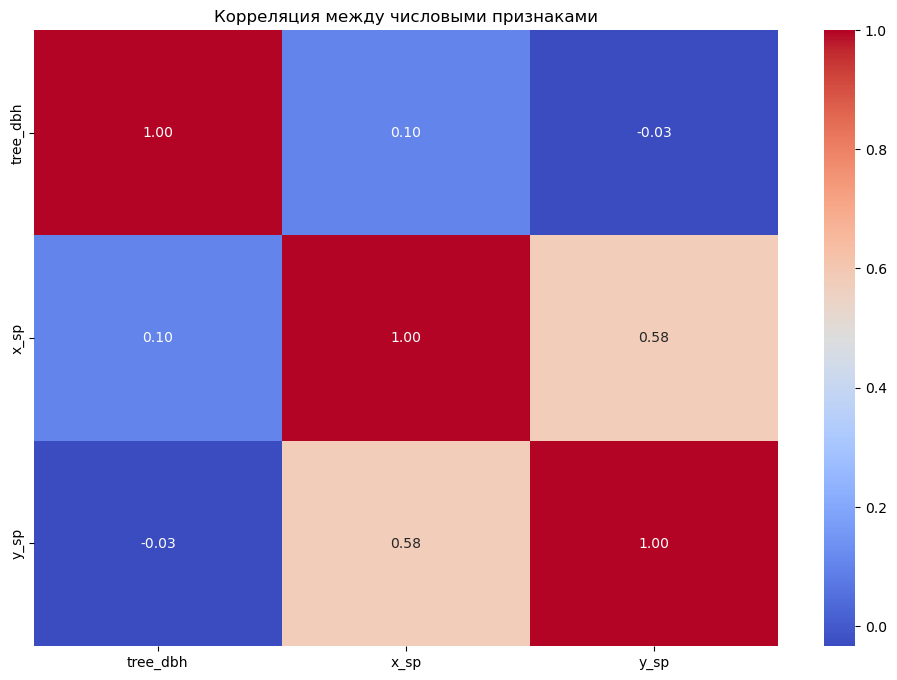

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция между числовыми признаками")
plt.show()

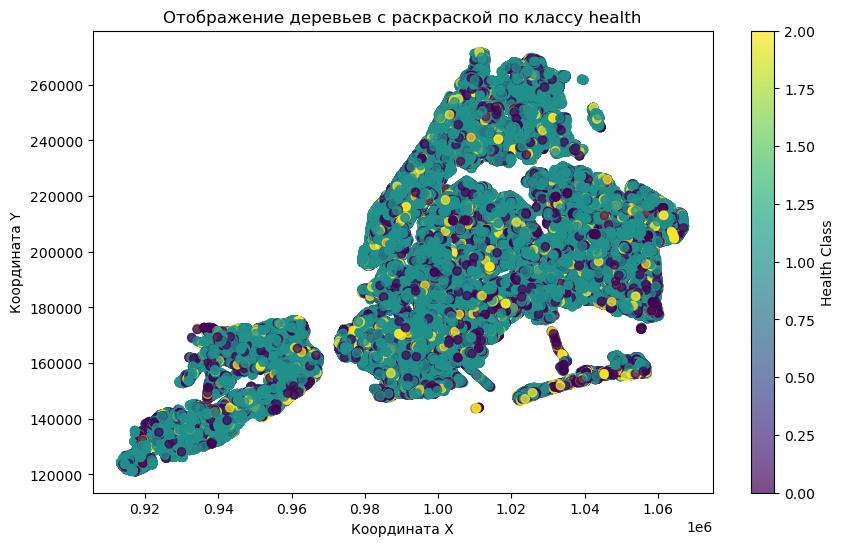

In [36]:
# Отображение деревьев по координатам в зависимости от их состояния
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['x_sp'], df['y_sp'], c=df['health'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Health Class')
plt.title('Отображение деревьев с раскраской по классу health')
plt.xlabel('Координата X')
plt.ylabel('Координата Y')
plt.show()

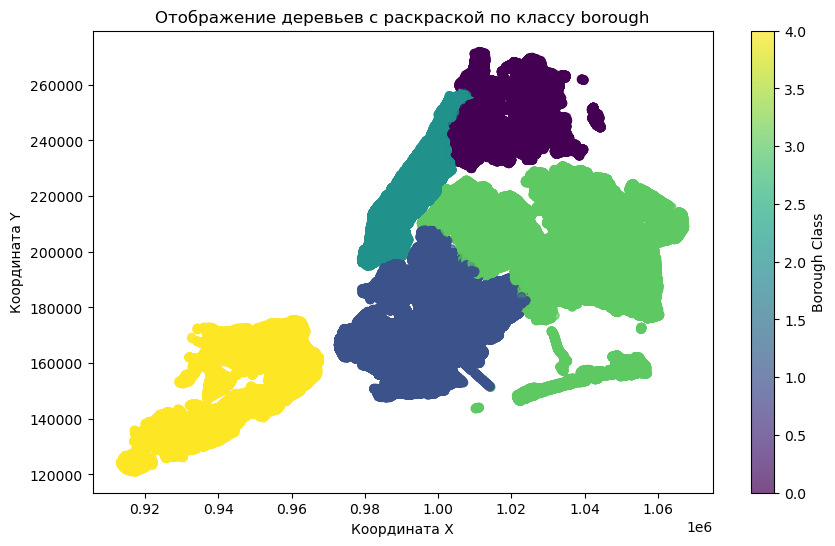

In [37]:
# Отображение деревьев по координатам и принадлежность их к району
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['x_sp'], df['y_sp'], c=df['borough'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Borough Class')
plt.title('Отображение деревьев с раскраской по классу borough')
plt.xlabel('Координата X')
plt.ylabel('Координата Y')
plt.show()

Из визуализации видно, что географические координаты никак не коррелируют с состоянием дерева, можем их убрать

In [38]:
# Просмотр первых строк датасета
df = df.drop(['x_sp', 'y_sp'], axis=1)
df.head()

,tree_dbh,curb_loc,health,steward,guards,sidewalk,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
0,3,OnCurb,Fair,No,No,NoDamage,No,No,No,No,No,No,No,No,No,Queens
1,21,OnCurb,Fair,No,No,Damage,Yes,No,No,No,No,No,No,No,No,Queens
2,3,OnCurb,Good,1or2,No,Damage,No,No,No,No,No,No,No,No,No,Brooklyn
3,10,OnCurb,Good,No,No,Damage,Yes,No,No,No,No,No,No,No,No,Brooklyn
4,21,OnCurb,Good,No,No,Damage,Yes,No,No,No,No,No,No,No,No,Brooklyn


In [39]:
# Также удаляем некоторые категориальные признаки, распределение которых одинаково в таргетной переменной
df = df.drop(['brch_shoe', 'root_other', 'trnk_other'], axis=1)
df.head()

,tree_dbh,curb_loc,health,steward,guards,sidewalk,root_stone,root_grate,trunk_wire,trnk_light,brch_light,brch_other,borough
0,3,OnCurb,Fair,No,No,NoDamage,No,No,No,No,No,No,Queens
1,21,OnCurb,Fair,No,No,Damage,Yes,No,No,No,No,No,Queens
2,3,OnCurb,Good,1or2,No,Damage,No,No,No,No,No,No,Brooklyn
3,10,OnCurb,Good,No,No,Damage,Yes,No,No,No,No,No,Brooklyn
4,21,OnCurb,Good,No,No,Damage,Yes,No,No,No,No,No,Brooklyn


In [40]:
# Декодируем таргетную переменную (2 - Good, 1 - Fair, 0 - Poor)
health_map = {'Good': 2, 'Fair': 1, 'Poor': 0}
df['health'] = df['health'].map(health_map)
df['health'].value_counts()

health
2    528850
1     96504
0     26818
Name: count, dtype: int64

In [41]:
cat_cols = df.select_dtypes(include='object').columns

In [42]:
# Просмотр первых строк датасета
encoded_df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
encoded_df.head()

,tree_dbh,health,curb_loc_OnCurb,steward_3or4,steward_4orMore,steward_No,guards_Helpful,guards_No,guards_Unsure,sidewalk_NoDamage,root_stone_Yes,root_grate_Yes,trunk_wire_Yes,trnk_light_Yes,brch_light_Yes,brch_other_Yes,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
0,3,1,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False
1,21,1,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
2,3,2,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,10,2,True,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False
4,21,2,True,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False


In [44]:
# Нормализуем вещественную колонку
scaler = MinMaxScaler()
encoded_df['tree_dbh'] = scaler.fit_transform(encoded_df[['tree_dbh']])

In [45]:
# Сохраняем наш scaler, понадобиться при инференсе
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [46]:
encoded_df.columns

Index(['tree_dbh', 'health', 'curb_loc_OnCurb', 'steward_3or4',
       'steward_4orMore', 'steward_No', 'guards_Helpful', 'guards_No',
       'guards_Unsure', 'sidewalk_NoDamage', 'root_stone_Yes',
       'root_grate_Yes', 'trunk_wire_Yes', 'trnk_light_Yes', 'brch_light_Yes',
       'brch_other_Yes', 'borough_Brooklyn', 'borough_Manhattan',
       'borough_Queens', 'borough_Staten Island'],
      dtype='object')

In [47]:
encoded_df = encoded_df.replace({True: 1, False: 0})

In [48]:
# Сохраняем получившийся датасет для последующего обучения модели
encoded_df.to_csv('final_df.csv', sep=';', index=False)